In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.shape

(5171, 4)

In [7]:
##emails = ["Free money now, click here!", "Win a lottery by clicking here!", "Hurry, limited time offer"]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df.text)
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df_bow)

      00  000  0000  000000  000000000002858  000000000049773  000080  000099  \
0      1    0     0       0                0                0       0       0   
1      0    0     0       0                0                0       0       0   
2      0    0     0       0                0                0       0       0   
3      0    0     0       0                0                0       0       0   
4      0    0     0       0                0                0       0       0   
...   ..  ...   ...     ...              ...              ...     ...     ...   
5166   0    0     0       0                0                0       0       0   
5167   0    4     0       0                0                0       0       0   
5168   0    0     0       0                0                0       0       0   
5169   0    0     0       0                0                0       0       0   
5170   0    0     0       0                0                0       0       0   

      0001  00018  ...  zyn

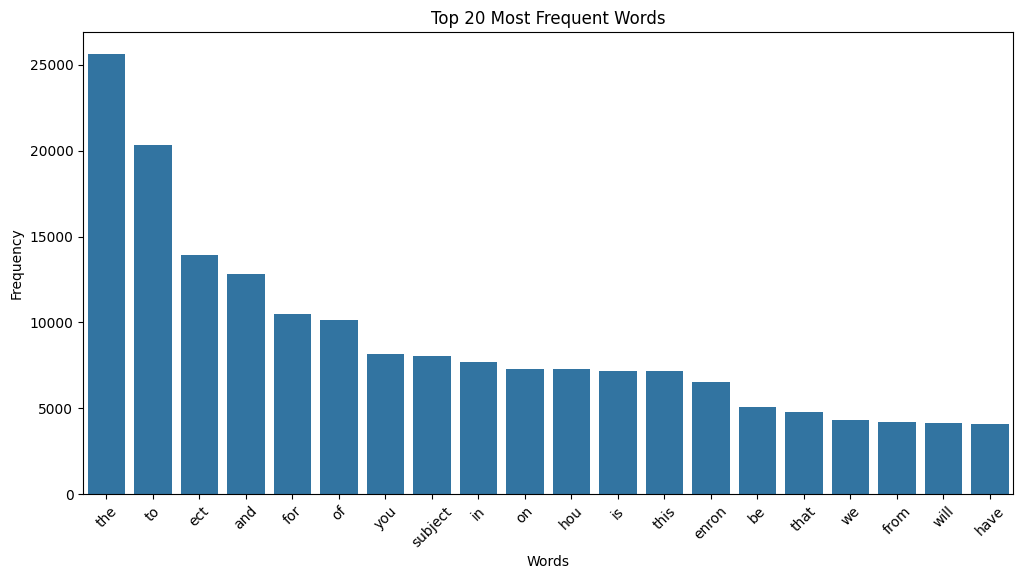

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_bow_cleaned = df_bow.loc[:, ~df_bow.columns.str.contains('^\d+')]

word_frequencies = df_bow_cleaned.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=word_frequencies.index, y=word_frequencies.values)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()